In [22]:
# Ariana Freitag
# ECE-475, Professor Sam Keene
# Linear Regression: Mean Squared Error and the effect of Lasso and Ridge Regularization
# Dataset From: http://users.stat.ufl.edu/~winner/data/berry_sugar_chewy.txt

import pandas as pd
import numpy as np
import statsmodels.api as sm
import sys
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.23.0


In [23]:
data = pd.read_csv("/Users/Ariana/Desktop/2018-2019/MachineLearning/train.csv")
dataTest = pd.read_csv("/Users/Ariana/Desktop/2018-2019/MachineLearning/holdout.csv")

In [27]:
# assign sugar,nacl and chewiness to X and Y
X = data[['sugar','nacl']]
y = data['chewiness'].values
# non-regularized for linear
Xnon = X
ynon = y
# regularize data
cols_to_norm = ['nacl','sugar']
X[cols_to_norm] = X[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# add ones to x for intercept term 
int = np.ones(shape=y.shape)[..., None]
X = np.concatenate((int, X), 1)
Xnon = np.concatenate((int, Xnon), 1)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


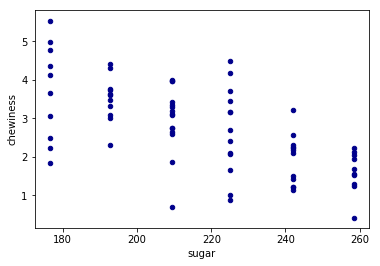

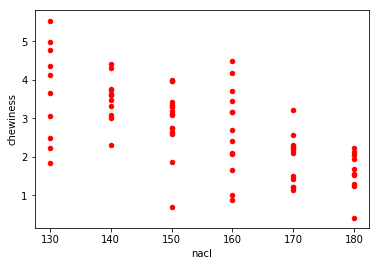

In [34]:
# plot training data
ax1 = data.plot.scatter(x='sugar', y ='chewiness', c='DarkBlue')
ax1 = data.plot.scatter(x='nacl', y ='chewiness', c='red')

In [28]:
# find beta and predict y
from numpy.linalg import inv
B = inv(Xnon.transpose().dot(Xnon)).dot(Xnon.transpose()).dot(ynon)
ypred = Xnon.dot(B)

In [29]:
#get RMSE on beta with no penalty
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(ynon, ypred)
mse1

0.7214076226426985

In [6]:
# find lambda using ridge
from numpy.linalg import inv
I = np.identity(3)
lam = np.array([[0.0001, 0.0001, 0.0001], [0.0001, 0.0001, 0.0001], [0.0001, 0.0001, 0.0001]])
B2 = inv((X.transpose().dot(X))-(lam.dot(I))).dot(X.transpose()).dot(y)
ypred2 = B2.dot(X.transpose()) # because of dimension agreements

In [7]:
#get MSE on beta with penalty term
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(ypred2, y)
mse2

0.7214076226612525

In [8]:
# implement lasso to get beta and RMSE (using lib functions :-)
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.0005, normalize=True)
lassoReg.fit(X,y)
ypred3 = lassoReg.predict(X)

.

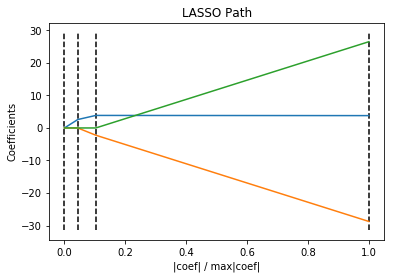

In [12]:
# do lasso plot
import matplotlib.pyplot as plt
from sklearn import linear_model
_, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T) 
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

In [13]:
# get MSE for lasso -- gives a number that doesn't make sense
from sklearn.metrics import mean_squared_error
mse3 = mean_squared_error(ypred3, y)
mse3

0.7290639564517697

In [14]:
# set up holdout set
# assign sugar,nacl and chewiness to X and Y
Xtest = dataTest[['sugar','nacl']]
ytest = dataTest['chewiness'].values
# regularize data
cols_to_norm = ['nacl','sugar']
Xtest[cols_to_norm] = Xtest[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# add ones to x for intercept term 
int = np.ones(shape=ytest.shape)[..., None]
Xtest = np.concatenate((int, Xtest), 1)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [20]:
# score data sets
ytest1 = Xtest.dot(B)
msetest1 = mean_squared_error(ytest1, ytest)
ytest2 = B2.dot(Xtest.transpose())
msetest2 = mean_squared_error(ytest2, ytest)
ytest3 = lassoReg.predict(Xtest)
msetest3 = mean_squared_error(ytest2, ytest)

print(msetest1, msetest2, msetest3) 
print(ytest.mean(), ytest1.mean(), ytest2.mean(), ytest3.mean())

1.2347277770454 1.234724372477059 1.234724372477059
2.585205263157895 2.7428712103927246 2.74287354526293 2.755053902882969


In [21]:
# Explaination
# The MSE I get from lasso and ridge regularization versus doing no regression, is barely smaller.
# I got the best MSE for the train data set using ridge, but on the test set, the three MSEs were all the same.
# Ultimately, I think I am not able to determine which model is better, because my dataset only contained 90 observations.
# In the future I would pick a larger dataset to use, but at least I learned how to write ML algorithms in python. 